# 3 线性回归
## 3.1 简单线性回归
简单线性回归是一种基于单个预测变量$X$定量预测$Y$的非常直接的方法。它假定$X$和$Y$之间近似成线性关系。
$$Y \approx \beta_0 + \beta_1X \tag{3.1}$$
在3.1式中，$\beta_0$和$\beta_1$是两个未知常数，分别表示线性模型中的截距项和斜率项。$\beta_0$和$\beta_1$被称为模型系数或参数。一旦我们使用训练数据来估算模型系数，我们就可以用计算的方式，根据电视广告的特定价值来预测未来销售。
$$\hat y = \hat\beta_0 + \hat\beta_1x \tag{3.2}$$

### 3.1.1 参数估计
在实践中，$\beta_0$和$\beta_1$是未知的。所以，在我们利用(3.1)做预测之前，我们必须使用数据来估计参数。我们的目标是获得$\beta_0$和$\beta_1$的系数估计值，使线性模型(3.1)能够很好地拟合现有数据。到目前为止，最常用的方法是最小二乘法，我们将在本章中采用这种方法。

设$\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$基于$X$的第i个值对$Y$的预测，则$e_i = y_i − \hat y_i$ 表示第i个残差，是第i个观测值与用线性模型得出的预测值之间的差。我们定义残差平方和(RSS)为$$RSS=e_1^2+e_2^2+\cdots+e_n^2$$或等价为$$RSS=(y_1-\hat\beta_0 - \hat\beta_1 x_1)^2+(y_2-\hat\beta_0 - \hat\beta_1 x_2)^2+\cdots+(y_n-\hat\beta_0 - \hat\beta_1 x_n)^2\tag{3.3}$$

最小二乘法选择$\hat\beta_0$和$\hat\beta_1$，使得RSS最小化。利用一些微积分，可以证明当RSS最小时：
$$
\begin{align}
\hat\beta_1&=\frac{\sum_{i=1}^{n}{(x_i-\bar x)(y_i-\bar y)}}{\sum_{i=1}^{n}{(x_i-\bar x)^2}}\tag{3.4},\\
\hat\beta_0 &= \bar y - \hat\beta_1\bar x
\end{align}
$$

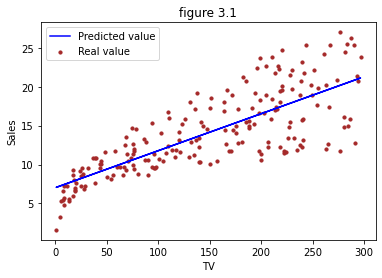

In [1]:
# 安装包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from math import *
import seaborn as sns
import patsy

# 载入数据
Advertising = pd.read_csv('C:/Users/ASUS/Desktop/Linear Regression/Advertising.csv',index_col=0)

# 对电视广告(TV)和销售量(sales)做回归
x = Advertising['TV']
y = Advertising['sales']

X = sm.add_constant(x) # 为模型增加常数项
ols = sm.OLS(y,X).fit() # 回归

# 图3.1
plt.scatter(x,y,label='Real value',c='brown',s=10) # 绘制散点图
plt.plot(x,ols.fittedvalues,label='Predicted value',color='b') # 添加回归线
plt.xlabel('TV') # 横坐标名称
plt.ylabel('Sales') # 纵坐标名称
plt.title('figure 3.1') # 添加标题
plt.legend() # 增加图例
plt.show() # 显示图像

图3.1显示了广告数据的简单线性回归，$\hat\beta_0 = 7.03$ and $\hat\beta_1 = 0.0475$。
换句话说，据估计，在电视广告上额外增加1,000美元，就能多卖出大约47.5件产品。

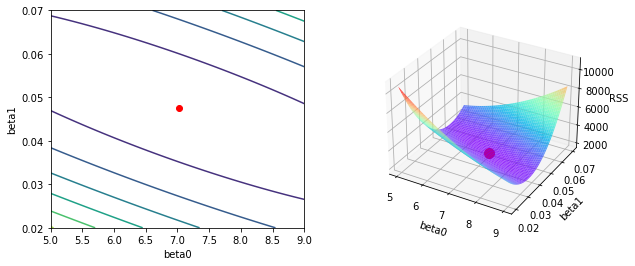

In [2]:
beta0 = np.linspace(5,9,num=100) # 在5—9构建等差数列（共100个）
beta1 = np.linspace(0.02,0.07,num=100) # # 在0.02—0.07构建等差数列（共100个）

x,y = np.meshgrid(beta0,beta1) # 生成网格点坐标(x轴、y轴)
z = Advertising[['sales','TV']].apply(lambda i:np.square(i[0]-x-y*i[1]) ,axis=1).sum() # 求出残差平方和
z1 = Advertising[['sales','TV']].apply(lambda i:np.square(i[0]-ols.params[0]-ols.params[1]*i[1]) ,axis=1).sum() # 求出最小二乘的残差平方和

# 图3.2
plt.figure(num=2,figsize=(10,4)) # 绘制图像，编号为2，宽10英寸、高4英寸
plt.subplot(121) # 1行，2列，绘制第1张图
plt.contour(x, y, z) # 作出轮廓线
plt.scatter(ols.params[0],ols.params[1],c='r') # 最小二乘估计
plt.xlabel('beta0') # 修改x轴名称为'beta0'
plt.ylabel('beta1') # 修改y轴名称为'beta1'

ax = plt.subplot(122, projection='3d') # 绘制第2张图，该图为3维图形
ax.scatter(ols.params[0],ols.params[1],z1, c='r',s=100) # 最小二乘估计
ax.plot_surface(x,y,z,cmap='rainbow',alpha=0.8) # 生成表面，颜色为彩色，不透明度为0.8
ax.set_xlabel('beta0') # x轴名称为'beta0'
ax.set_ylabel('beta1') # y轴名称为'beta1'
ax.set_zlabel('RSS') # z轴名称为'RSS'
plt.show() # 显示图片

在图3.2，我们使用广告数据，用电视广告费用来预测销售量，计算了一系列$\beta_0$和$\beta_1$的RSS。在每张图中，红点表示的是(3.4)给出的最小二乘估计$(\hat\beta_0,\hat\beta_1)$。这些值很明显地最小化了RSS。

### 3.1.2 评估参数估计的准确性
我们假设$X$和$Y$之间的真实关系遵循以下形式：
$$ Y=\beta_0+\beta_1 X+\epsilon\tag{3.5}$$
$\epsilon$是均值为0的随机误差。误差项是我们在这个简单模型中所忽略的：真正的关系可能不是线性的，可能有其他变量导致Y的变化，可能有测量误差。我们通常假设误差项是独立于X的。

我们想知道$\hat\beta_0$和$\hat\beta_1$与其真实值有多接近。为了计算与$\beta_0$和$\beta_1$相关的标准误差，我们使用以下公式：
$$SE(\hat\beta_0)^2=\sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=1}^{n}{(x_i-\bar x)^2}}], \quad SE(\hat\beta_1)^2=\frac{\sigma^2}{\sum_{i=1}^{n}{(x_i-\bar x)^2}}\tag{3.8}$$
其中，$\sigma^2=Var(\epsilon)$.
为了使这些公式严格有效，我们需要假设每个观测的误差$\epsilon_i$与方差$\sigma^2$不相关。一般来说，$\sigma^2$是未知的，但可以从数据中估计出来。对$\sigma^2$的估计称为残差标准误差，计算公式为：
$$RSE=\sqrt{RSS/(n-2)}$$

标准误差能够被用来计算置信区间。一个95%的置信区间定义为一个值的范围，在95%的概率下，该范围将包含参数的真实未知值。对于线性回归，$\beta_1$的置信区间近似为
$$\hat\beta_1\pm2*SE(\hat\beta_1)\tag{3.9}$$

标准误差也可用来对系数进行假设检验，最常用的假设检验是对原假设的检验
$$H_0: \beta_1 = 0$$
与之相对的是对备择假设的检验
$$H_1: \beta_1 \neq 0 $$
在实践中，我们计算t统计量，计算公式如下
$$t=\frac{\hat\beta_1 -0}{SE(\hat\beta_1)}\tag{3.14}$$
它衡量了$\beta_1$与0的差值是标准差的多少倍。t分布呈钟形，当n大于30左右时，它与正态分布非常相似。因此，计算出绝对值大于或等于|t|的概率是一件简单的事情，我们称这个概率为p值。

表3.1详细给出了广告数据中电视广告预算对销售单位数回归的最小二乘模型。

In [3]:
# 表3.1
ols.summary2().tables[1] # 查看ols的基本信息

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,7.032594,0.457843,15.360275,1.406300e-35,6.129719,7.935468
TV,0.047537,0.002691,17.667626,1.467390e-42,0.042231,0.052843


### 3.1.3 评估模型的准确性
#### 残差标准误
RSE是$\epsilon$标准差的估计值，计算公式如下：
$$ RSE=\sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}}\tag{3.15}$$
RSE被认为是模型(3.5)对数据拟合不足的度量。

#### $R^2$ 统计量
$R^2$ 统计量提供了另一种拟合方式，它采用比例的形式（解释方差的比例），所以它的取值在0到1之间，并且与y的大小无关。为了计算$R^2$，我们使用这个公式：
$$R^2=\frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}\tag{3.17}$$
$TSS=\sum{(y_i-\bar y)^2}$是总体平方和。
TSS测量的是总平方和，RSS测量残差平方和。因此，$R^2$测量的是用$Y$的变异中可以由$X$解释的比例。

$R^2$统计量是对$X$与$Y$之间线性关系的一种度量。回想一下相关性：
$$Cor(X,Y)=\frac{\sum_{i=1}^{n}{(x_i-\bar x)(y_i-\bar y)}}{\sqrt{\sum_{i=1}^{n}{(x_i-\bar x)^2}}\sqrt{\sum_{i=1}^{n}{(y_i-\bar y)^2}}}\tag{3.18}$$
相关性也是对$X$与$Y$之间线性关系的一种度量。事实上，在简单线性回归中，$R^2=r^2$.

In [4]:
# 表 3.2
pd.DataFrame({'Quantity':['Residual Standard Error','R-squared','F-statistic'],'Value':[np.sqrt(ols.mse_resid),ols.rsquared,ols.fvalue]})
# 创建数据框

,Quantity,Value
0,Residual Standard Error,3.258656
1,R-squared,0.611875
2,F-statistic,312.144994


## 3.2 多元线性回归
我们如何扩展对广告数据的分析，以适应另外两个额外的预测因素？一种选择是使用三个独立的简单线性回归，每个回归都使用不同的广告媒介作为预测。例如，我们可以拟合一个简单线性回归，用广播广告来预测销售量。结果见表3.3。

In [5]:
# 对广播广告与报纸广告分别作线性回归
x1 = Advertising['radio'] # 提取'radio'数据
x2 = Advertising['newspaper'] # 提取'newspaper'数据
y = Advertising['sales'] # 提取'sales'数据

X1 = sm.add_constant(x1) # 添加常数项
X2 = sm.add_constant(x2) # 添加常数项
ols1 = sm.OLS(y,X1).fit() # 对'radio'回归
ols2 = sm.OLS(y,X2).fit() # 对'newspaper'回归

# 表3.3
ols1.summary2().tables[1] # ols1基本信息

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,9.311638,0.562900,16.542245,3.561071e-39,8.201588,10.421688
radio,0.202496,0.020411,9.920765,4.354966e-19,0.162244,0.242747


In [6]:
# Table 3.3
ols2.summary2().tables[1] # ols2基本信息

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,12.351407,0.621420,19.876096,4.713507e-49,11.125956,13.576859
newspaper,0.054693,0.016576,3.299591,1.148196e-03,0.022005,0.087381


与其为每个预测因子拟合一个单独的简单线性回归模型，更好的方法是扩展简单线性回归模型(3.5)，使其可以直接容纳多个预测因子。我们可以通过在单个模型中给每个预测因子一个单独的斜率系数来做到这一点。一般来说，假设我们有p个不同的预测因子，然后采用多元线性回归模型的形式
$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\cdots+\beta_p X_p+\epsilon\tag{3.19}$$

### 3.2.1 估计回归系数
这些参数是用最小二乘法估计的，这与我们在简单线性回归中看到的相同。我们选择$\beta_0$, $\beta_1$,...,$\beta_p$来最小化残差平方和$$RSS=\sum_{i=1}^{n}{(y_i-\hat y_i)^2}=\sum_{i=1}^{n}{(y_i-\hat\beta_0-\hat\beta_1 x_{i1}-\cdots-\hat\beta_p x_{ip})^2}\tag{3.22}$$

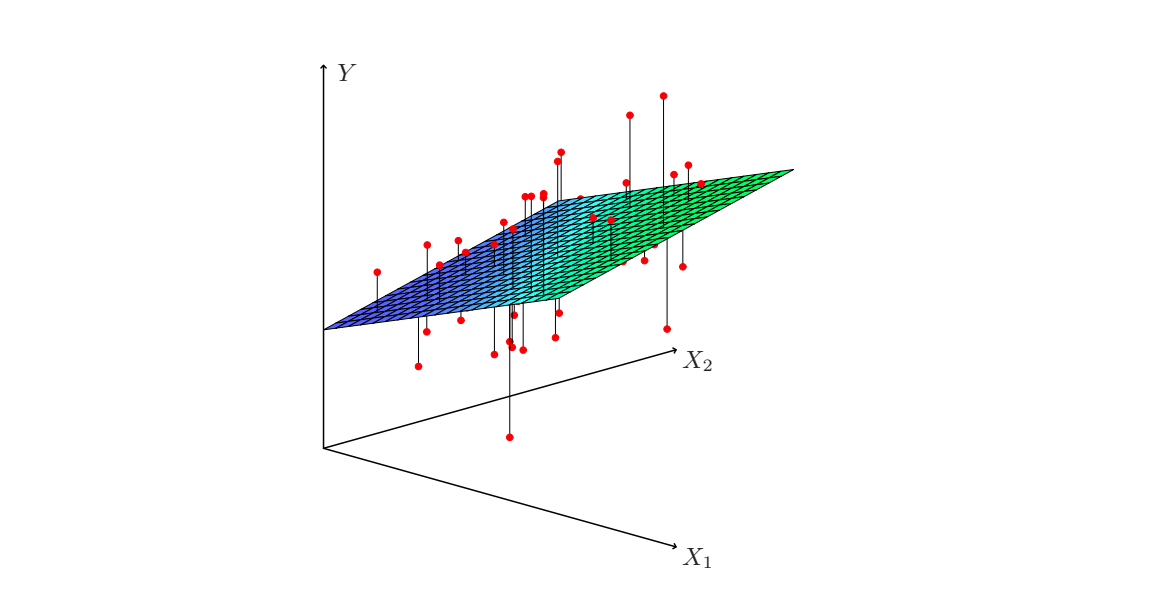
图3.4举例说明了最小二乘拟合一个玩具数据集与2个预测因子的例子。

In [7]:
x = Advertising[['TV','radio','newspaper']]
y = Advertising['sales']
X = sm.add_constant(x)
ols = sm.OLS(y, X).fit() # 多元线性回归

# Table 3.4
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.938889,0.311908,9.422288,1.267295e-17,2.323762,3.554016
TV,0.045765,0.001395,32.808624,1.509960e-81,0.043014,0.048516
radio,0.188530,0.008611,21.893496,1.505339e-54,0.171547,0.205513
newspaper,-0.001037,0.005871,-0.176715,8.599151e-01,-0.012616,0.010541


表3.4显示了当电视、广播和报纸广告预算被用于预测产品销售时的多元回归系数估计值。

将这些系数估值与表3.1和表3.3中显示的系数估计值进行比较，我们注意到电视和广播的多元回归系数估计值与简单线性回归系数估计值非常相似。然而，虽然表3.3中的报纸回归系数估计值显著异于零，但多元回归模型中报纸的系数估计值接近零，对应的p值不再显著，约为0.86。这说明了简单回归系数和多元回归系数会有很大的不同。

考虑三个预测变量和响应变量的相关矩阵，如表3.5所示。请注意，广播和报纸之间的相关系数是0.35。这表明，在广播广告投入较多的市场中，报纸广告投入也较多。

In [8]:
# 表 3.5
Advertising[['TV','radio','newspaper','sales']].corr() # 相关系数矩阵

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


现在，假设多元回归是正确的，报纸广告对销售没有直接影响，但电台广告确实增加了销售。那么在我们花更多钱在广播广告上的市场，我们的销售额也会更高，正如我们的相关矩阵所显示的，我们也会花更多钱在同样市场的报纸广告上。因此，在一个只考察了销售和报纸广告的简单线性回归中，我们将观察到，报纸广告的价值越高，销售量越高，即使报纸广告实际上并不影响销售。因此，报纸广告是广播广告的替代品；报纸因广播对销售的影响而“大受称赞”。

### 3.2.2 一些重要问题
#### 1：预测变量与响应之间是否存在某种关系？
在简单线性回归中，我们使用假设检验来回答这个问题。
如果要检验一个参数，我们可以用t检验。
原假设
$$ H_0: \beta_0=1$$
与之相对的备择假设
$$ H_1: \beta_0≠1$$
这个假设检验是通过计算t统计量来实现的，
$$t=\frac{\hat\beta_1 -1}{SE(\hat\beta_1)}\$$
如果$H_1$是正确的，我们希望t大于2.

In [9]:
results = pd.DataFrame(ols.summary2().tables[1])
b0 = results.iloc[0,0] # 提取b0
se = results.iloc[0,2] # 提取se
t = (b0-1)/se # 计算t值
t

0.2057769067239149

如果要检验多个参数，我们可以用F检验。
原假设
$$ H_0: \beta_1=\beta_2=\cdots=\beta_p=0$$
与之相对的备择假设
$$ H_a:  at\; least\; one\; \beta_j\; is\; non-zero.$$
这个假设检验是通过计算F统计量来实现的，
$$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}\tag{3.23}$$
如果$H_a$是正确的，我们希望F大于1。
通过对广播、电视和报纸广告与销售量进行回归得到的多元线性回归模型的F统计量如表3.6所示。

In [10]:
# 表 3.6
pd.DataFrame({'Quantity':['Residual Standard Error','R-squared','F-statistic'],'Value':[np.sqrt(ols.mse_resid),ols.rsquared,ols.fvalue]})

,Quantity,Value
0,Residual Standard Error,1.685510
1,R-squared,0.897211
2,F-statistic,570.270704


给定每个变量的p值，为什么我们需要看整体的F统计量？毕竟，如果单个变量的p值非常小，那么至少有一个预测变量与响应相关。然而，这种逻辑是有缺陷的，特别是当预测因子的数量p很大的时候。

例如，考虑一个例子：$p = 100$ and $H_0: \beta_1 = \beta_2=\cdots = \beta_p = 0$是正确的，所以没有变量与响应真正相关。在这种情况下，与每个变量相关的p值有大约5%的可能性会低于0.05。换句话说，即使预测因子和响应之间没有任何真正的关联，我们也将看到大约5个较小的p值。

但是，F统计量不受这个问题的影响，因为它会根据预测因子的数量进行调整。因此，如果$H_0$是正确的，F统计量对应p值低于0.05的概率只有5%，无论预测因子的数量或观察结果的数量如何。

#### 2：决定重要变量
确定哪些预测因子与响应相关联，以适应只包含这些预测因子的单一模型的任务称为变量选择。这里我们只提供一些经典方法的简要概述。
* 向前选择。我们从零模型开始，拟合p个简单线性回归，并将导致最低RSS的变量添加到零模型中。
* 向后选择。我们从模型中的所有变量开始，移除p值最大的变量。
* 混合选择。这是向前选择和向后选择的组合。我们一开始在模型中没有变量，而在前向选择中，我们添加提供最适合的变量。我们继续逐个添加变量。如果模型中任意一个变量的p值高于某个阈值，那么我们就将该变量从模型中移除。

#### 3：模型拟合
我们可以看到，如果我们在已经包含电视和广播广告的模型中加入报纸广告，则$R^2$会有一个小的增长，尽管我们之前看到，在表3.4中报纸广告的p值并不显著。事实证明，当更多的变量被添加到模型中时，$R^2$总是会增加的，即使这些变量与响应的关联很弱。

仅包含电视和广播广告作为预测因子的模型RSE为1.681，而同时包含报纸作为预测因子的模型的RSE为1.686(表3.6)。相比之下，只包含电视的模型的RSE为3.26(表3.2)。这证实了我们之前的结论，即使用电视和广播支出来预测销售更准确。一般来说，RSE被定义为
$$RSE=\sqrt{\frac{1}{n-p-1}RSS}\tag{3.25}$$
因此，如果相对于p的增加而言，RSS的降低很小，那么包含更多变量的模型就可以有更高的RSE。

除了查看刚刚讨论过的RSE和$R^2$统计量外，绘制数据图也很有用。图形总结可以揭示模型的问题，而这些问题在数字统计中是看不到的。例如，图3.5显示了电视、广播广告与销售的三维图。

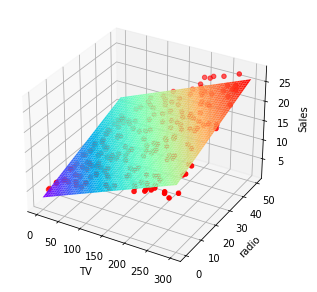

In [11]:
x = Advertising['TV']
y = Advertising['radio']
z = Advertising['sales']

x1 = np.column_stack((x,y)) # 将'TV'与'radio'按列合并
X = sm.add_constant(x1) # 添加常数项

ols = sm.OLS(z,X).fit() # 多元线性回归

x_new = np.linspace(0,300,num=500)
y_new = np.linspace(0,50,num=500)
X_new, Y_new = np.meshgrid(x_new, y_new) # 生成坐标系
Z = ols.params[0]+ols.params[1]*X_new+ols.params[2]*Y_new # 最小二乘拟合销售量

# 图3.5
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c='r') # 散点图
ax.plot_surface(X_new,Y_new,Z,cmap='rainbow')
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('Sales')
plt.show()

特别地，线性模型似乎高估了销售量，因为大多数的广告费用只花在电视或只花在广播上。而在广告预算由两种媒体分摊的情况下，它低估了销售额。

#### 4：预测
一旦我们拟合了多元回归模型，就可以直接应用(3.21)，以便根据一组预测变量的值来预测响应$𝑌$。然而，这一预测存在三种不确定性。

1. 参数估计
$\hat\beta_0,\hat\beta_1,\cdots,\hat\beta_p$是$\beta_0,\beta_1,\cdots,\beta_p$的估计值。也就是说，最小二乘$$ \hat Y=\hat\beta_0+\hat\beta_1 X_1+\cdots+\hat\beta_p X_p$$只是对真实的总体回归的一个估计。
$$ f(X)=\beta_0 +\beta_1 X_1+\cdots+\beta_p X_p$$
我们可以计算出一个置信区间来确定$\hat Y$与$f(X)$的差异大小。


2. 当然，在实践中，假设$f(X)$的线性模型几乎总是现实的近似，所以还有一个潜在的可以减少误差的额外来源，我们称之为模型偏差。所以当我们使用线性模型时，我们实际上是在估计真实曲面的最佳线性近似。然而，这里我们将忽略这个差异，并假设线性模型是正确的。


3. 即使知道$f(X)$，由于随机误差$\epsilon$，我们也不能很好地预测响应值。$Y$和$\hat Y$相差多少？我们用预测区间来回答这个问题。预测区间总是比置信区间宽，因为它们不仅包含了对$f(X)$的估计误差，还包含了单个点与总体回归平面差异的不确定性。

我们使用置信区间来量化大量城市中平均销售信心的不确定性。例如，假设每个城市的电视广告花费10万美元，广播广告花费2万美元，则95%置信区间为[10,985,11,528]。我们将其解释为95%的区间将包含$f(X)$的真值。另一方面，预测区间可以用来量化特定城市销售预测的不确定性。假设在那个城市里，10万美元花在电视广告上，2万美元花在广播广告上，则95%的预测区间为[7930,14580]。我们将此解释为，该表单95%的区间将包含该城市的真实值$Y$。注意，这两个区间都集中在11,256，但**预测区间比置信区间要宽得多**，这反映了与许多地点的平均销售额相比，某个城市销售的不确定性增加了。

## 3.3 回归模型中的其他考虑
### 3.3.1 定性预测
Credit数据集包含关于许多潜在客户的余额、年龄、信用卡、教育、收入、限额和评级的信息。

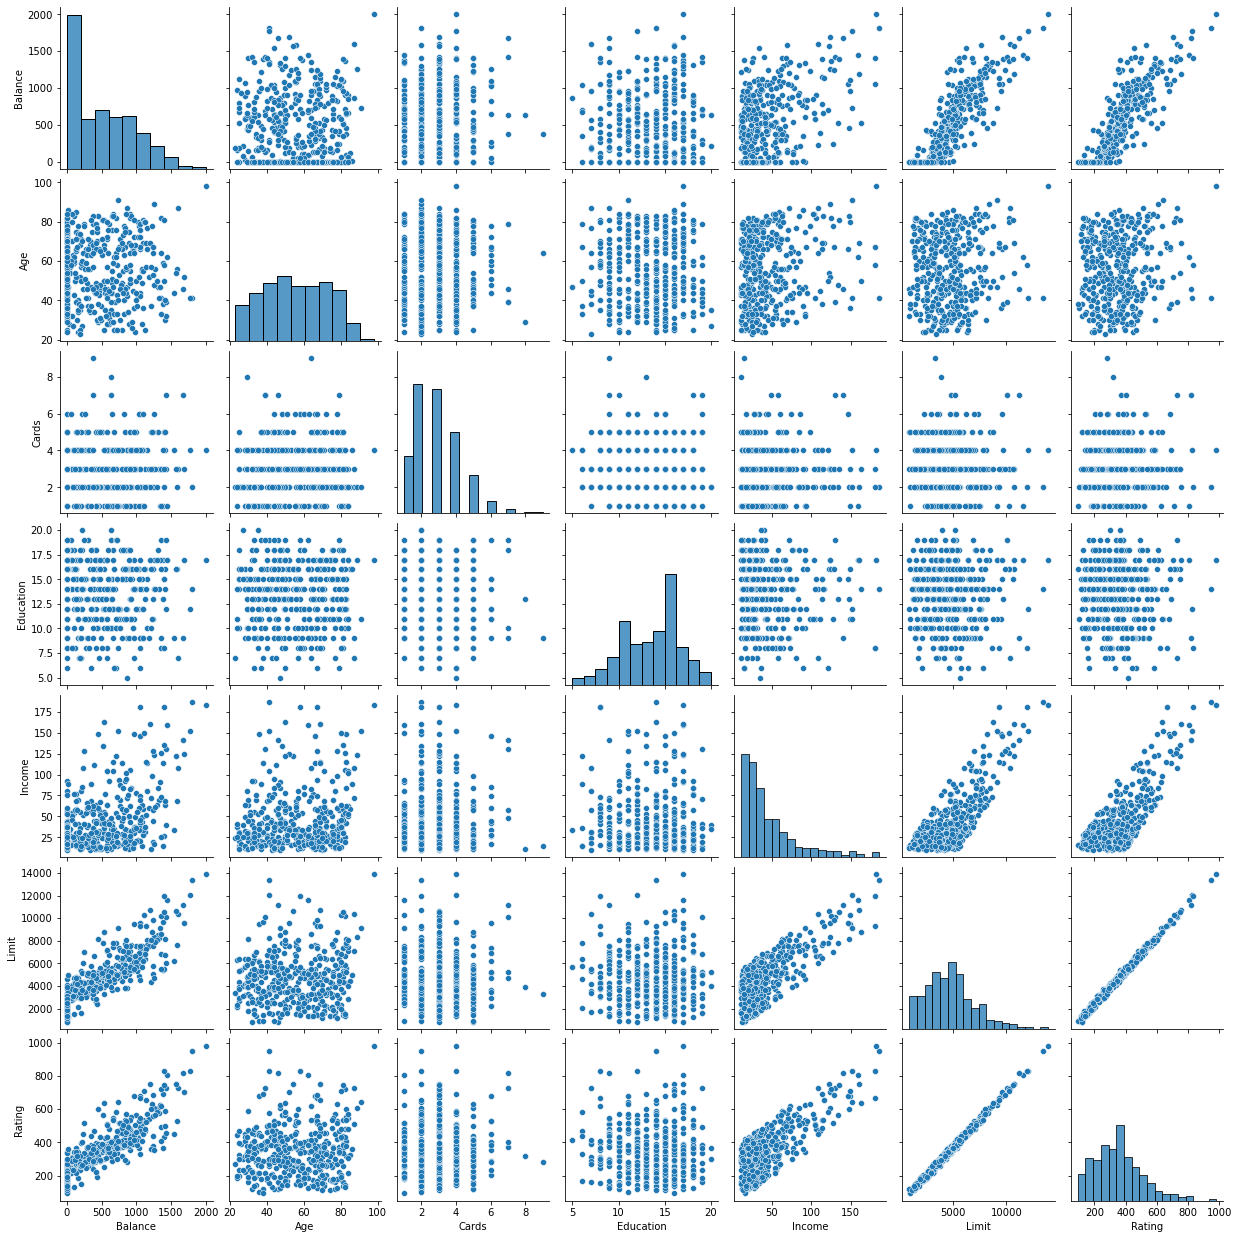

In [12]:
Credit = pd.read_csv('C:/Users/ASUS/Desktop/Linear Regression/Credit.csv',index_col=0)
# 图3.6
sns.pairplot(Credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])
plt.show()
# 对角线上是各个属性的直方图，非对角线上是两个不同属性之间的相关图

#### 只有2个水平的预测因子
假设我们希望调查男性和女性之间信用卡余额的差异。我们只需创建一个指示变量或虚拟变量，它采用两个可能的虚拟数值。例如，基于性别变量，我们可以创建一个具有该形式的新变量
$$x_i=\begin{cases}
1 & 如果第i个人是女性 \\ 0 & 如果第i个人是男性
\end{cases}\tag{3.26}$$
用这个变量作为回归方程的预测因子。这就是模型的结果
$$
y_i=\beta_0+\beta_1 x_i+\epsilon_i=\begin{cases}
\beta_0+\beta_1+\epsilon_i & 如果第i个人是女性 \\ \beta_0+\epsilon_i & 如果第i个人是男性
\end{cases}\tag{3.27}
$$

表3.7显示了与模型(3.27)相关的参数估计和其他信息。男性的平均信用卡债务估计为509.80美元，而女性的信用卡债务估计为19.73美元，总计为509.80美元+ 19.73美元= 529.53美元。然而，我们注意到哑变量的p值非常高。这表明，没有统计证据表明不同性别之间的平均信用卡余额存在差异。

In [13]:
# 创建虚拟变量
dummy_fields = ['Gender','Student','Married','Ethnicity']
for i in dummy_fields:
    dummies = pd.get_dummies(Credit[i], prefix=i) # 特征提取
    Credit = pd.concat([Credit,dummies],axis=1) # 数据合并
x = Credit['Gender_Female']
y = Credit['Balance']

# 回归
X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()

# 表 3.7
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,509.803109,33.128077,15.388853,2.908941e-42,444.675221,574.930997
Gender_Female,19.733123,46.051210,0.428504,6.685161e-01,-70.800900,110.267146


#### 两个以上水平的定性预测
当一个定性预测因子有两个以上的水平时，一个虚拟变量不能代表所有可能的值。在这种情况下，我们可以创建额外的虚拟变量。例如，对于种族变量，我们创建了两个虚拟变量。第一个虚拟变量为
$$
x_{i1}=\begin{cases}
1 & 如果第i个人是亚洲人 \\ 
0 & 如果第i个人不是亚洲人
\end{cases}\tag{3.28}
$$
第二个虚拟变量为
$$
x_{i2}=\begin{cases}
1 & 如果第i个人是白种人 \\ 
0 & 如果第i个人不是白种人
\end{cases}\tag{3.29}
$$
然后这两个变量都可以在回归方程中使用，从而得到模型
$$
y_i=\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+\epsilon_i=\begin{cases}
\beta_0+\beta_1+\epsilon_i & 如果第i个人是亚洲人 \\ 
\beta_0+\beta_2+\epsilon_i & 如果第i个人不是亚洲人\\
\beta_0+\epsilon_i & 如果第i个人是非洲裔美国人
\end{cases}\tag{3.30}
$$
哑变量的数量总是比水平数要少一个。没有虚拟变量的水平——在这个例子中是非洲裔美国人——被称为基线。

In [14]:
x = Credit[['Ethnicity_Asian','Ethnicity_Caucasian']]
y = Credit['Balance']

X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()

# 表3.8
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,531.000000,46.318683,11.464057,1.774117e-26,439.939441,622.060559
Ethnicity_Asian,-18.686275,65.021075,-0.287388,7.739652e-01,-146.514940,109.142391
Ethnicity_Caucasian,-12.502513,56.681038,-0.220577,8.255355e-01,-123.935021,98.929995


### 3.3.2 线性模型的扩展
标准的线性回归模型(3.19)提供了可解释的结果，并在许多现实问题上效果相当好。然而，它做了几个具有高度限制性的假设，这些假设在实践中经常被违反。两个最重要的假设表明，预测因子和反应之间的关系是线性可加的。可加假设意味着预测因子$X_j$的变化对响应$Y$的影响独立于其他预测因子的值。线性假设表明，无论$X_j$的值如何，由$X_j$一个单位的变化而引起的$Y$的变化是常数。

在这里，我们简要地研究一些扩展线性模型的常用经典方法。

#### 移除可加假设
在我们之前对广告数据的分析中，我们得出结论，电视和广播似乎都与销售有关。然而，这个简单的模型可能是不正确的。假设花在广播广告上的钱实际上增加了电视广告的效果，那么电视广告的斜率项应该随着广播的增加而增加。

扩展这个模型以考虑交互影响的一种方法是引入第三个预测因子，称为交互项：
$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\beta_3 X_1X_2+\epsilon\tag{3.31}$$
引入这个交互项如何放松可加的假设？
注意(3.31)还可以写为
$$ Y=\beta_0+(\beta_1+\beta_3 X_2)X_1 +\beta_2 X_2 +\epsilon=\beta_0+\tilde\beta_1 X_1+\beta_2 X_2 +\epsilon\tag{3.32}$$
由于$\tilde\beta_1$随着$X_2$的变化而变化，$X_1$对$Y$的影响不再是恒定不变的：对$X_2$的调整将改变$X_1$对$Y$的影响。

拟合模型(3.32)得到的系数如表3.9所示。表3.9的结果强烈表明，包含交互项的模型优于只包含主要效应的模型。电视广告增加1000美元，会使得销售量增加$(\beta_1+\beta_3×radio)×1000 = 19+1.1×radio$个单位。

In [15]:
# * 包含TV, radio以及交互项TV × radio

# 回归
f = 'sales~TV*radio' 
y, X = patsy.dmatrices(f, Advertising, return_type='matrix')
ols = sm.OLS(y, X).fit()
# 解释变量为TV, radio, TV*radio
# 被解释变量为sales
# 数据集为Advertising

# 表 3.9
ols.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,6.750220,0.247871,27.232755,1.541461e-68,6.261383,7.239058
TV,0.019101,0.001504,12.698953,2.363605e-27,0.016135,0.022067
radio,0.028860,0.008905,3.240815,1.400461e-03,0.011298,0.046423
TV:radio,0.001086,0.000052,20.726564,2.757681e-51,0.000983,0.001190


相互作用的概念同样适用于定性变量，或定量和定性变量的组合。考虑3.3.1节中的Credit数据集，并假设我们使用收入(定量)和学生(定性)变量来预测信贷余额。在没有交互项的情况下，模型采用这种形式
$$
balance_i=\beta_0+\beta_1\times income_i+\begin{cases}
\beta_2 & 如果第i个人是一名学生 \\ 
0 & 如果第i个人不是一名学生
\end{cases}\tag{3.34}
$$
请注意，这相当于对数据拟合了两条平行线，一条用于学生，另一条用于非学生。这在图3.7左边的图中进行了说明。这两条线是平行的，这意味着收入增加一个单位对信贷余额的平均影响并不取决于该人是否为学生。

这个缺陷可以通过添加一个交互项来解决，这个交互项是通过将收入与学生虚拟变量相乘来创建的。
我们的模型现在变成
$$
balance_i=\beta_0+\beta_1\times income_i+\begin{cases}
\beta_2+\beta_3\times income_i & 如果是学生 \\ 
0 & 如果不是学生
\end{cases}\tag{3.35}
$$
图3.7右边的图显示了模型(3.35)中学生和非学生的收入和信贷余额之间的估计关系。我们注意到学生的斜率小于非学生的斜率。这表明，与非学生相比，收入的增加会引起学生信贷余额更小幅度的增长。

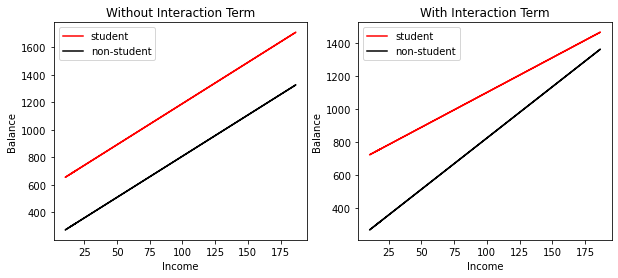

In [16]:
# 没有交互项
x1 = Credit[['Income','Student_Yes']]
y = Credit['Balance']
X1 = sm.add_constant(x1)
ols1 = sm.OLS(y,X1).fit() # 回归

# 手动分类
x_yes = np.column_stack((Credit['Income'],np.ones(len(Credit))))
x_no = np.column_stack((Credit['Income'],np.zeros(len(Credit))))
# np.ones(len(Credit))：创建一个行数为len(Credit)、全是1的矩阵
# np.column_stack：将Income与创建的矩阵合并

# 分别进行回归预测
X_yes = sm.add_constant(x_yes, has_constant='add')
X_no = sm.add_constant(x_no, has_constant='add')

y_yes = ols1.predict(X_yes)
y_no = ols1.predict(X_no)

# 有交互项
f = 'Balance~Income*Student_Yes' 
y, X2 = patsy.dmatrices(f, Credit, return_type='matrix')
ols2 = sm.OLS(y,X2).fit() # 回归

# 手动分类
x_yes2 = np.column_stack((Credit['Income'],np.ones(len(Credit)),Credit['Income']))
x_no2 = np.column_stack((Credit['Income'],np.zeros(len(Credit)),np.zeros(len(Credit))))
# 合并income、虚拟变量、Income*Student_Yes

# 分别进行回归预测
X_yes2 = sm.add_constant(x_yes2, has_constant='add')
X_no2 = sm.add_constant(x_no2, has_constant='add')

y_yes2 = ols2.predict(X_yes2)
y_no2 = ols2.predict(X_no2)

# 图 3.7
plt.figure(num=2,figsize=(10,4))
# 图3.7-1（无交互项）
plt.subplot(121)
plt.plot(Credit['Income'],y_yes,label='student',c='r')
plt.plot(Credit['Income'],y_no,label='non-student',c='black')
plt.ylabel('Balance')
plt.xlabel('Income')
plt.title('Without Interaction Term')
plt.legend()

# 图3.7-2（有交互项）
plt.subplot(122)
plt.plot(Credit['Income'],y_yes2,label='student',c='r')
plt.plot(Credit['Income'],y_no2,label='non-student',c='black')
plt.ylabel('Balance')
plt.xlabel('Income')
plt.title('With Interaction Term')
plt.legend()
plt.show()

#### 非线性关系
如前所述，线性回归模型(3.19)假设响应和预测因子之间存在线性关系。但在某些情况下，响应和预测因子之间的真正关系可能是非线性的。

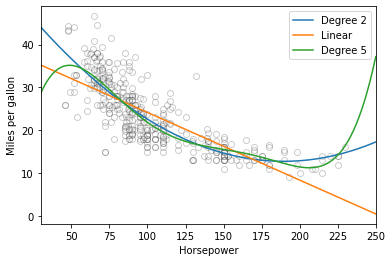

In [17]:
Auto = pd.read_csv('C:/Users/ASUS/Desktop/Linear Regression/Auto.csv')
# Horsepower部分数据存在字符串'?'，转化成'np.nan'
Auto['horsepower'] = Auto['horsepower'].replace('?', np.nan)
x = Auto['horsepower'].astype(float)
y = Auto['mpg']

# 线性回归
X = sm.add_constant(x)
ols = sm.OLS(y,X,missing='drop').fit() # 剔除缺失值

x_new = np.linspace(30,250,num=500)
X_new = sm.add_constant(x_new)
y1 = ols.predict(X_new) # 预测（x范围为30-250）

# 2阶
x2 = np.column_stack((x, x**2))
X2 = sm.add_constant(x2) 
ols2 = sm.OLS(y,X2,missing='drop').fit()

x2_new =  np.column_stack((x_new, x_new**2)) # 自变量：x, x**2
X2_new = sm.add_constant(x2_new)
y2 = ols2.predict(X2_new)

# 5阶
x5 = np.column_stack((x, x**2, x**3, x**4, x**5))
X5 = sm.add_constant(x5) 
ols5 = sm.OLS(y,X5,missing='drop').fit()

x5_new =  np.column_stack((x_new, x_new**2, x_new**3, x_new**4, x_new**5))
# 自变量：x, x**2, x**3, x**4, x**5
X5_new = sm.add_constant(x5_new)
y5 = ols5.predict(X5_new)

# Figure 3.8
plt.plot(x_new,y2,label='Degree 2')
plt.plot(x_new,y1,label='Linear')
plt.plot(x_new,y5,label='Degree 5') 
plt.scatter(x,y,c='white',edgecolors='black',alpha=0.2)
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.xlim(30,250)
plt.legend()
plt.show()

如图3.8，我们可以看到汽车数据集中一些汽车的mpg(每加仑汽油的油耗)与马力的关系。图3.8中的点似乎有一个二次型的形状，表明一个二次模型
$$
mpg=\beta_0+\beta_1\times horsepower+\beta_2\times horsepower^2+\epsilon\tag{3.36}
$$
可能会更好地拟合数据。
公式3.36使用了马力的非线性函数来预测mpg，但它仍然是一个线性模型。
二次拟合似乎比只包含线性项时得到的拟合要好得多。二次拟合的$R_2$为0.688，线性拟合的$R_2$为0.606，表3.10中二次项的p值非常显著。

In [18]:
# 表 3.10
ols2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,56.900100,1.800427,31.603673,1.740911e-109,53.360315,60.439885
x1,-0.466190,0.031125,-14.978164,2.289429e-40,-0.527383,-0.404996
x2,0.001231,0.000122,10.080093,2.196340e-21,0.000991,0.001471


### 3.3.3 潜在问题
1. 数据的非线性

线性回归模型假设预测因子和响应之间存在线性关系。如果真正的关系远不是线性的，那么我们拟合得出的几乎所有结论都是可疑的。此外，模型的预测精度会显著降低。
残差图是识别非线性的一种有用的图形工具。

图3.9的左面板显示了从mpg到马力的线性回归的残差图。图3.9的右面板显示的是模型(3.36)的残差图，该模型中包含了一个二次项。在残差中似乎没有什么模式，这表明二次项对数据的拟合有所改善。

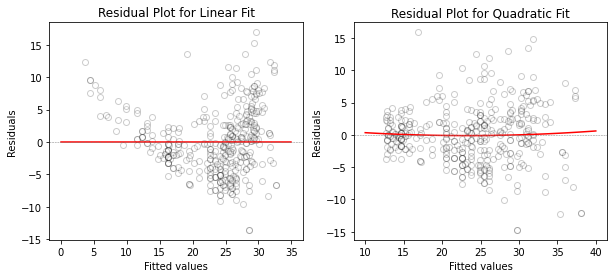

In [19]:
resid1 = ols.resid # 线性回归残差
resid2 = ols2.resid # 非线性回归残差

# 线性拟合
parameter1 = np.polyfit(ols.fittedvalues,resid1,1) # 用1次多项式拟合
p1 = np.poly1d(parameter1) # 得到多项式系数
# ols.fittedvalues:获取拟合y值

# 二次拟合
parameter2 = np.polyfit(ols2.fittedvalues,resid2,2) # 用2次多项式拟合
p2 = np.poly1d(parameter2) # 得到多项式系数

xt1=np.linspace(0,35,num=100)
xt2=np.linspace(10,40,num=100)

# 图 3.9
# 线性拟合残差图
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.plot(xt1, p1(xt1), color='r') # 完美拟合
plt.scatter(ols.fittedvalues,resid1,c='white',edgecolors='black',alpha=0.2) # 残差散点图
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.axhline(y=0,ls='--',c='gray',lw=0.5) # 绘制平行于x轴的灰色水平线
plt.title('Residual Plot for Linear Fit')

# 二次拟合残差图
plt.subplot(122)
plt.plot(xt2, p2(xt2), color='r')
plt.scatter(ols2.fittedvalues,resid2,c='white',edgecolors='black',alpha=0.2)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residual Plot for Quadratic Fit')
plt.axhline(y=0,ls='--',c='gray',lw=0.5) # # 绘制平行于x轴的灰色水平线
plt.show()

2. 误差项的相关性

线性回归模型的一个重要假设是误差项是不相关的。如果误差项之间确实存在相关性，那么估计的标准误差将会低估真实的标准误差。因此，置信区间和预测区间将比实际更窄。

误差相关性在时间序列数据中经常发生。在许多情况下，在相邻时间点获得的观测结果会有正相关的误差。为了确定给定数据集是否存在这种情况，我们可以将模型中的残差绘制成时间的函数。

图3.10提供了一个说明。在上面的面板中，我们能看到线性回归拟合产生的误差不相关数据的残差，没有证据表明该残差具有时间趋势。相比之下，底部面板中的残差来自于相邻误差相关系数为0.9的数据集，在残差中有一个清晰的模式——相邻残差取值较为相近。
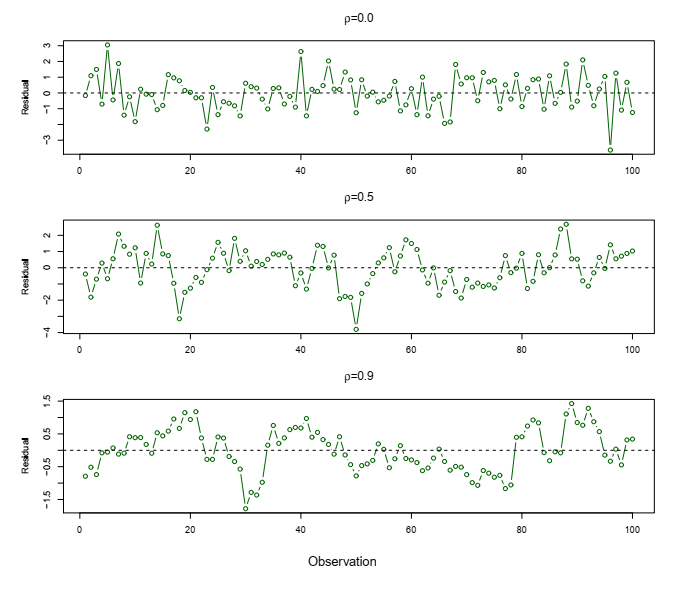

3. 误差项的异方差性

线性回归模型的另一个重要假设是误差项有一个恒定的方差，$Var(\epsilon_i)=\sigma^2$.
不幸的是，通常情况下，误差项具有异方差性。例如，误差项的方差可能会随着响应值的增加而增加。我们可以从异方差图(残差图)中漏斗形状的存在来识别误差中的非常数方差或异方差。
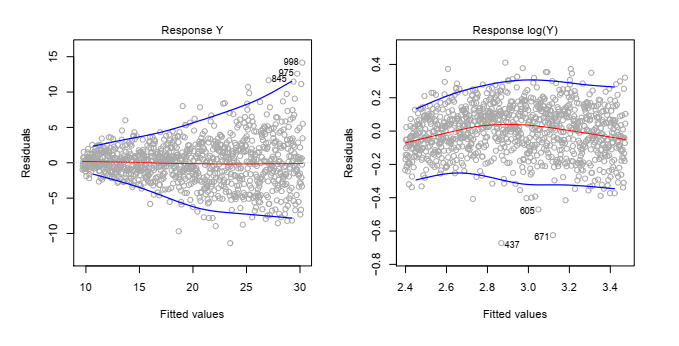
在图3.11的左面板中显示了一个例子，残差的大小随着拟合值的增加而增加。当遇到这个问题时，一种可能的解决方案是使用凹函数(如$log Y$)来转换响应$Y$。图3.11的右面板显示了使用$logY$转换响应后的残差图。

4. 离群值

离群值是指$y_i$与异常值的模型预测值相差甚远的点。异常值的出现有多种原因，例如在数据收集过程中对观测结果的错误记录。
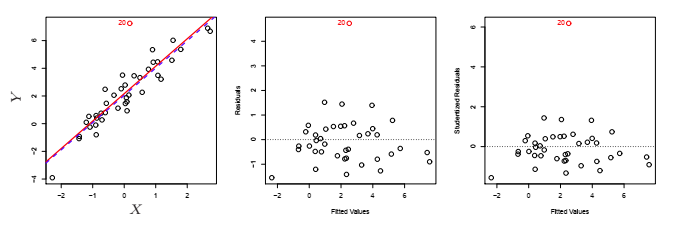
图3.12左侧面板中的红点(观察值20)说明了一个典型的异常值。在这种情况下，去除异常值对最小二乘线的影响很小。然而，它也会导致其他问题。例如，在本例中，当离群值被纳入回归时，RSE为1.09，但当离群值被去除时，RSE仅为0.77。

残差图可用来识别异常值。在本例中，离群值在图3.12的残差图中清晰可见。但在实践中，很难确定残差多大才能将其视为异常值。为了解决这个问题，我们不是绘制残差，而是绘制学习化残差，计算方法是用每个残差$\epsilon_i$除以对应的标准学习化误差的估计值。学习化残差绝对值大于3的观测值可能是异常值。

5. 高杠杆点

离群值是指残差与其他点相比较大的点，是针对因变量$Y_i$而言的。相反，高杠杆点通常指自变量$x_i$中出现的异常点。例如，图3.13左侧面板中的观测点41具有较高的杠杆，因为该观察的预测值相对于其他观察值较大。比较图3.12和图3.13的左侧面板，我们发现，去除高杠杆观察值对最小二乘线的影响要比去除离群值大得多。事实上，高杠杆点往往对估计的回归线有相当大的影响。
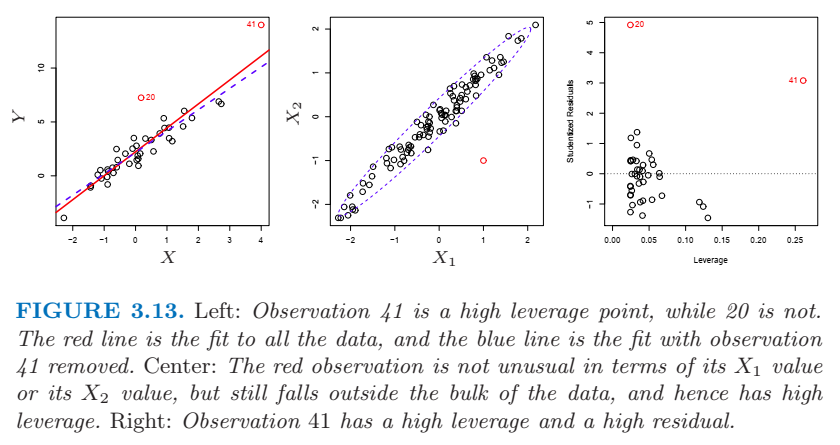
在简单线性回归中，高杠杆观测值相当容易识别，因为我们可以简单地寻找预测值超出正常观测值范围的观测值。但是在一个有许多预测因子的多元线性回归中，有可能在每个单一预测因子的范围内都有一个很好的观测值，但这在整套预测因子中是异常的。在图3.13中间的面板中显示了一个例子，大多数预测值都在蓝色虚线椭圆内，但红色观测值远远超出了这个范围。但无论是$X_1$还是$X_2$的值都是正常的。
为了量化观测值的杠杆，我们计算杠杆效应。对于简单的线性回归，
$$
h_i=\frac{1}{n}+\frac{(x_i-\bar x)^2}{\sum_{i'=1}^{n}[(x_{i'}-\bar x)^2]}\tag{3.37}
$$
图3.13的右侧面板展示了图3.13左侧面板数据的学生化残差与$h_i$的关系。观测点41具有非常高的杠杆统计和高的学生化残差。换句话说，它是一个异常值，也是一个高杠杆观察值。

6. 共线性

共线性是指两个或两个以上预测变量密切相关的情况。图3.14使用Credit数据集说明了共线性的概念。在图3.14的左面板中，限额和年龄这两个预测因子似乎没有明显的关系。相比之下，在图3.14的右边面板中，预测因子的限额和评级之间是高度相关的，我们说它们共线性。

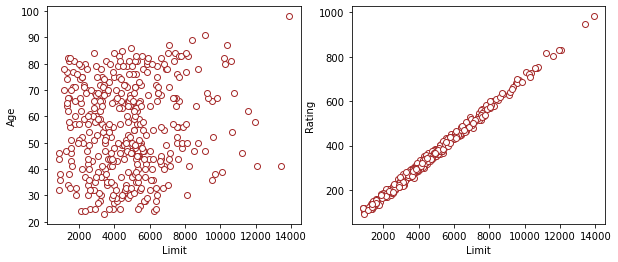

In [20]:
# 筛选变量
x1 = Credit['Limit']
x2 = Credit['Age']
x3 = Credit['Rating']
y = Credit['Balance']

x_1 = np.column_stack((x1,x2)) # 合并limit与age
x_2 = np.column_stack((x1,x3)) # 合并limit与rating
X1 = sm.add_constant(x_1)
X2 = sm.add_constant(x_2)

ols1 = sm.OLS(y,X1).fit() # 线性回归
ols2 = sm.OLS(y,X2).fit() # 线性回归

# 图 3.14
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.scatter(x1,x2,c='white',edgecolors='brown')
plt.xlabel('Limit')
plt.ylabel('Age')

plt.subplot(122)
plt.scatter(x1,x3,c='white',edgecolors='brown')
plt.xlabel('Limit')
plt.ylabel('Rating')
plt.show()

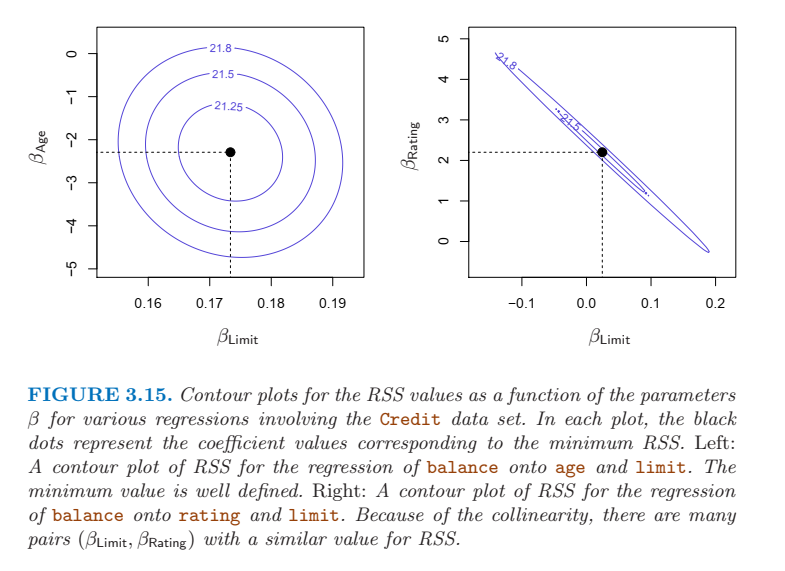
图3.15说明了共线性可能导致的一些问题。图3.15的左面板是年龄和余额做回归时参数估计的RSS(3.22)轮廓图。图3.15的右侧面板显示了限额、信用评级与余额做回归时参数估计的RSS轮廓图，而限额与信用评级是高度相关的。

等高线沿直线向上延伸；参数估计值的范围很广，从而导致RSS值相等。因此，数据一点微小的变化都可能会导致产生最小RSS的系数估计点沿图中直线移动。

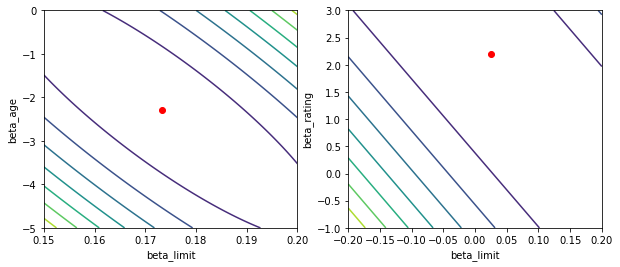

In [21]:
beta1 = np.linspace(0.15,0.2,num=100)
beta2 = np.linspace(-5,0,num=100)

beta3 = np.linspace(-0.2,0.2,num=100)
beta4 = np.linspace(-1,3,num=100)

x1,y1 = np.meshgrid(beta1,beta2) # 生成坐标系
z1 = Credit[['Balance','Limit','Age']].apply(lambda i:np.square(i[0]-x1*i[1]-y1*i[2]-ols1.params[0]) ,axis=1).sum() # 残差平方和

x2,y2 = np.meshgrid(beta3,beta4)
z2 = Credit[['Balance','Limit','Rating']].apply(lambda i:np.square(i[0]-x2*i[1]-y2*i[2]-ols2.params[0]) ,axis=1).sum() # 残差平方和

# 变量说明
# ols.params[0]：常数项
# ols.params[1]：beta_1
# ols.params[2]：beta_2

# 画图
plt.figure(num=2,figsize=(10,4))
plt.subplot(121)
plt.contour(x1, y1, z1) # 轮廓线
plt.scatter(ols1.params[1],ols1.params[2],c='r') # 最小二乘估计
plt.xlabel('beta_limit')
plt.ylabel('beta_age')

plt.subplot(122)
plt.contour(x2, y2, z2) # 轮廓线
plt.scatter(ols2.params[1],ols2.params[2],c='r') # 最小二乘估计
plt.xlabel('beta_limit')
plt.ylabel('beta_rating')
plt.show()

共线性降低了回归系数估计的准确性。表3.11比较了从两个独立的多元回归模型得到的参数估计值。

In [22]:
x1 = Credit[['Age','Limit']]
x2 = Credit[['Rating','Limit']]
y = Credit['Balance']

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)

ols1 = sm.OLS(y,X1).fit()
ols2 = sm.OLS(y,X2).fit()

# 表 3.11
ols1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-173.410901,43.828387,-3.956589,9.005366e-05,-259.575644,-87.246158
Age,-2.291486,0.672485,-3.407492,7.226468e-04,-3.613562,-0.969410
Limit,0.173365,0.005026,34.495944,1.627198e-121,0.163485,0.183245


In [23]:
ols2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-377.536795,45.254176,-8.342585,1.213565e-15,-466.504579,-288.569012
Rating,2.201672,0.952294,2.311967,2.129053e-02,0.329503,4.073841
Limit,0.024514,0.063835,0.384030,7.011619e-01,-0.100982,0.150010


检测共线性的一个简单方法是观察预测因子的相关矩阵。矩阵中绝对值较大的元素表示一对高度相关的变量，因此数据中存在共线性问题。不幸的是，并不是所有的共线性问题都可以通过检验相关矩阵检测到：即使没有一对变量具有特别高的相关性，三个或更多的变量之间也可能存在共线性。我们称这种情况为多重共线性。

在检查相关矩阵以外，一个更好的评估多重共线性的方法是计算方差扩大因子(VIF)。VIF表示的是回归系数估计量的方差与假设自变量间不线性相关时方差相比的比值。
VIF的最小值为1，表示完全不存在共线性。根据经验，VIF值超过5或10表示有问题的共线性。每个变量的VIF都可以使用该公式计算
$$
VIF(\hat\beta_j)=\frac{1}{1-R^2_{X_j|X_{-j}}}
$$
其中$ R_{X_j|X_{-j}}^2$是$X_j$对其余自变量作回归分析的的$R^2$。

在Credit数据中，用年龄、评级和限制对余额进行回归，预测因子的VIF值分别为1.01、160.67和160.59。正如我们所怀疑的，数据中有较大共线性！

## 3.4 营销计划
现在我们简要地回到我们在本章开始时打算回答的关于广告数据的七个问题。

1. 广告销售和预算之间有关系吗？

这个问题可以通过(3.20)拟合电视、广播和报纸的销售的多元回归模型来回答，并检验假设$H_0: \beta_{TV} = \beta_{radio} = \beta_{newspaper} = 0$。在第3.2.2节中，我们证明了F统计量可以用来决定我们是否应该拒绝这个原假设。在这种情况下，表3.6中F统计量对应的p值非常低，这表明广告和销售之间存在关系。

2. 这种关系有多强？

我们在第3.1.3节讨论了模型精度的两种度量方法。首先，RSE估计$Y$的标准差。对于Advertising数据，RSE为1681，而$y$的平均值为14022，百分比误差约为12%。其次，$R^2$统计量记录了能够由$X$解释的$Y$变异的百分比。预测因子解释了几乎90%的销售变异。表3.6显示了RSE和$R^2$统计量。

3. 哪些媒介有助于销售？

为了回答这个问题，我们可以检查每个预测因子t统计量的p值(第3.1.2节)。在表3.4所示的多元线性回归中，电视和广播的p值较低，而报纸的p值则不高，这表明只有电视和广播与销售有关。

4. 每种媒介对销售的影响有多大？

在第3.1.2节中，我们看到$\hat\beta_j$的标准误差可以用来构造$\beta_j$的置信区间。对于广告数据，95%置信区间为：电视为(0.043,0.049)，广播为(0.172,0.206)，报纸为(-0.013,0.011)。电视和广播的置信区间很窄，明显异于0，这证明了这些媒体与销售有关。但是报纸的区间包含了0，这表明报纸变量在统计上并不显著。

5. 我们能多准确地预测未来的销售？

$Y$可以用(3.21)来预测。估计的准确性取决于我们是希望预测单个个体的值，$Y = f(X) + \epsilon$，还是平均值，$f(X)$(章节3.2.2)。如果是前者，我们使用预测区间；如果是后者，我们使用置信区间。预测区间总是比置信区间宽，因为预测区间解释了与$\epsilon$相关的不确定性。

6. 这种关系是线性的吗？

在3.3.3节中，我们看到残差图可以用来识别非线性。如果关系是线性的，那么残差图应该没有规律。在Advertising数据集中，我们在图3.5中观察到一个非线性效应，尽管这种效应也可以在残差图中观察到。在第3.3.2节中，我们讨论了在线性回归模型中预测因子的转换，以适应非线性关系。

7. 广告媒体之间是否有协同作用？

在第3.3.2节中，我们展示了如何在回归模型中引入一个交互项，以适应非可加关系。与交互项相关的p值较小，则表明存在非线性关系。图3.5显示广告数据可能不是可加的。在模型中引入一个交互项会导致$R^2$的大幅增加，从大约90%增加到近97%。

## 3.5 线性回归与近邻法的比较
非参数方法并不明确地采用参数形式，因此为执行回归提供了另一种更灵活的方法。

***K-nearest neighbors regression (KNN regression)***
$$\hat f(x_0) = \frac{1}{K} \sum_{x_i\in{\mathscr{N_0}}}{y_i}$$
给定$K$的值和一个预测点$x_0$，KNN回归首先识别出最接近$x_0$的$K$训练观测值，用$\mathscr{N_0}$表示。然后使用$\mathscr{N_0}$中所有训练响应的平均值估计$f(x_0)$。

**$K$的最优值将在最小化偏差与方差之间权衡。**

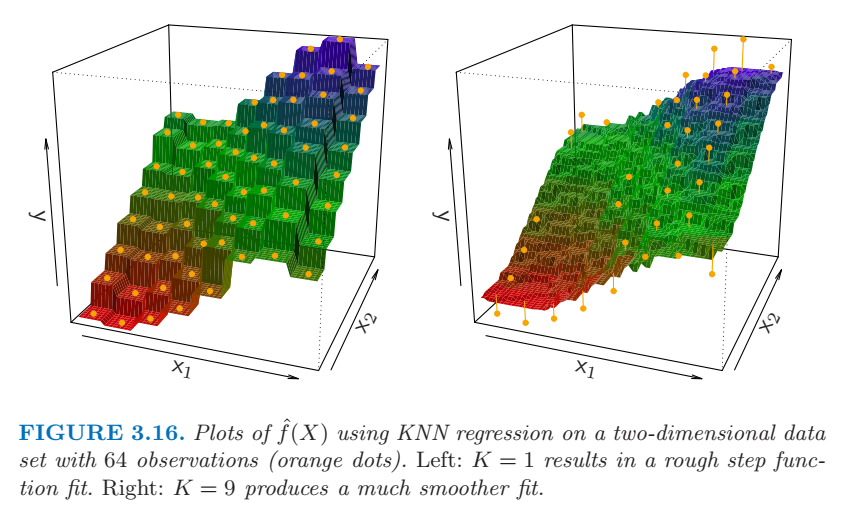
左：$K = 1$结果是一个粗糙的阶梯函数拟合。

右：$K = 9$产生更平滑的拟合。

**如果所选的参数形式接近$f$的真实形式，参数方法将优于非参数方法。**
* 线性模式更优
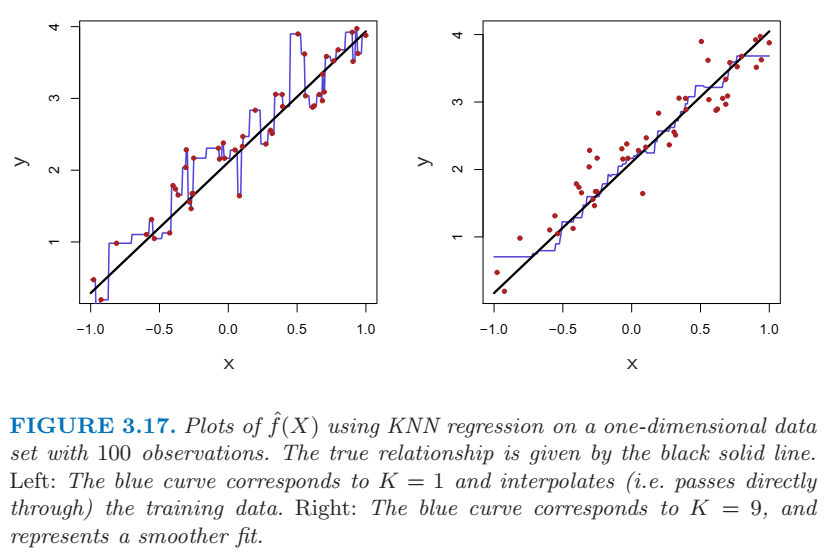

左：蓝色曲线对应$K = 1$。

右：蓝色曲线对应$K = 9$。

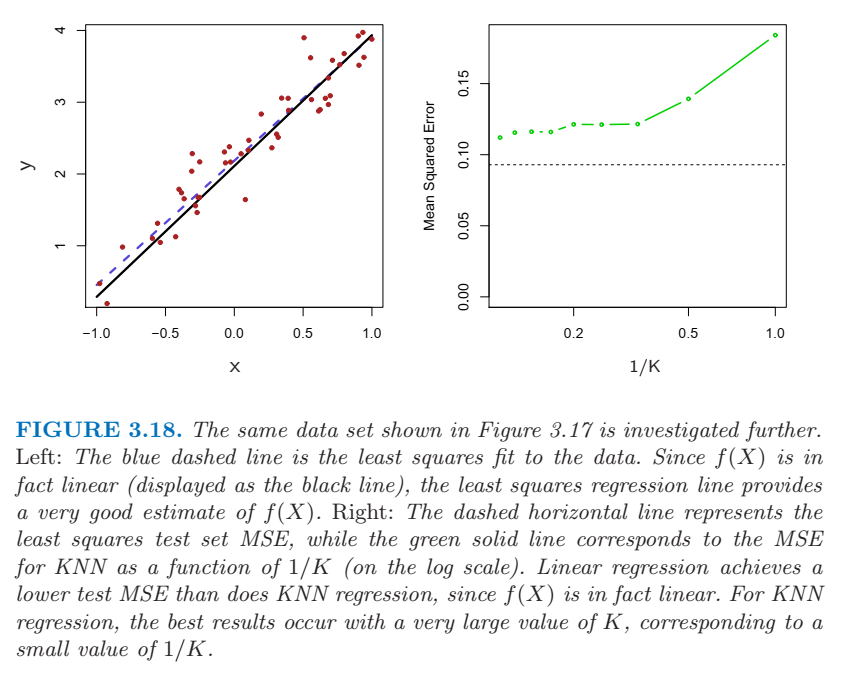

蓝色虚线是最小二乘拟合。

* KNN更优
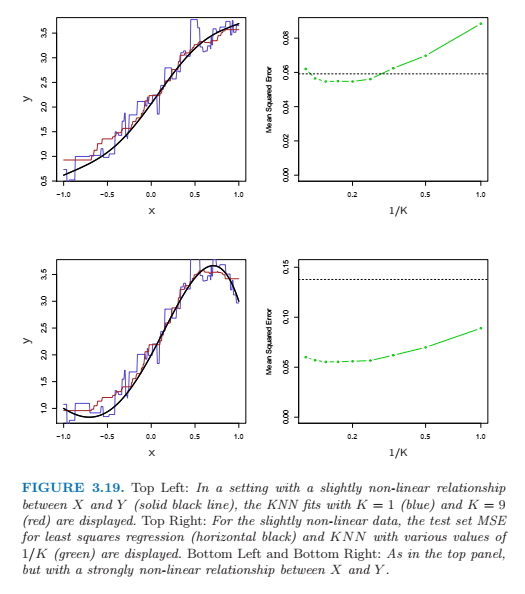

上图：X和Y之间有轻微的非线性关系(黑色实线)，KNN符合$K = 1$(蓝色)和$K = 9$(红色)；

下图：X和Y之间有很强的非线性关系。

**在更高维度的情况下，KNN的表现往往不如线性回归。**
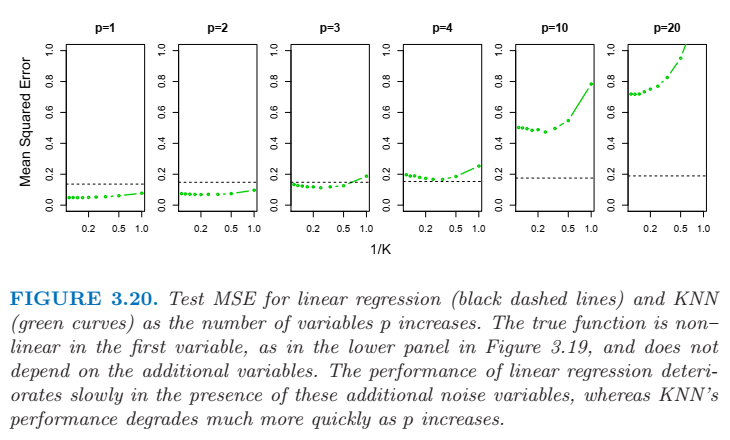
这里添加了与响应无关的额外噪声预测因子。
随着变量数$p$的增加，检验线性回归(黑色虚线)和KNN(绿色曲线)的MSE。
随着$p$的增加，线性回归的性能退化速度更慢，而KNN的性能退化速度快得多。

**当每个预测因子只有少量的观测值时，参数化方法将倾向于优于非参数方法。**

在$p = 20$、有100个观察结果时，会产生一种现象，即一个给定的观察没有相邻值——这就是所谓的 *维度灾难*。也就是说，在p维空间中，当p很大时，最接近给定测试观测$x_0$的K个观测值可能离$x_0$很远，导致$f(x_0)$的预测很差，因此KNN拟合很差。

## 3.6 实验:线性回归
### 3.6.1 函数库
### 3.6.2 简单线性回归
[Boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)，这是由美国人口普查局收集的有关波士顿地区住房的数据集。
波士顿数据集记录了波士顿周围506个社区的medv(房价中位数)，试图使用13个预测因子来预测medv，如rm(每所房子的平均房间数)、age(房屋的平均使用年限)和lstat(低社会经济地位家庭的百分比)。

In [24]:
Boston=pd.read_csv('C:/Users/ASUS/Desktop/Linear Regression/Boston.csv')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
# 对低社会经济地位家庭占比与房价中位数做回归
x = Boston['lstat']
y = Boston['medv']

X = sm.add_constant(x) # 添加常数项
ols = sm.OLS(y,X).fit()
print(ols.summary()) # 回归结果

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        12:07:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

要提取ols中的结果，请参阅[python statsmodel 回归结果提取](https://blog.csdn.net/chongminglun/article/details/104242342).

In [26]:
ols.params # 回归系数

const    34.553841
lstat    -0.950049
dtype: float64

In [27]:
ols.rsquared # R²

0.5441462975864797

In [28]:
ols.conf_int(alpha=0.05) # 置信区间

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


In [29]:
# 用低社会经济地位家庭占比预测房价中位数
print(ols.fittedvalues)

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64


In [30]:
ols.resid # 残差值

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

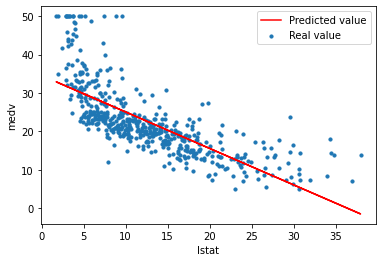

In [31]:
# 画图
plt.scatter(x,y,label='Real value',s=10)
plt.plot(x,ols.fittedvalues,label='Predicted value',color='r') # 拟合
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.show()

### 3.6.3 多元线性回归

In [32]:
# 对对低社会经济地位家庭占比、房屋平均使用年限与房价中位数做回归
x = Boston[['lstat','age']]
y = Boston['medv']

X = sm.add_constant(x) 
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.98e-88
Time:                        12:07:34   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [33]:
x=Boston.drop('medv',axis=1) # 删去'medv'列
y=Boston['medv']

# 多元线性回归
X = sm.add_constant(x) # 添加常数项
ols = sm.OLS(y,X).fit()
print(ols.summary())
# 自变量：数据中除'medv'的所有变量
# 因变量：'medv'

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        12:07:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [34]:
# 计算方差扩大因子
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.Series([variance_inflation_factor(X.values, i) # 加上了常数项
               for i in range(len(X.columns))],  # 计算所有自变量VIF
              index=X.columns)
print(vif)

const      585.265238
crim         1.792192
zn           2.298758
indus        3.991596
chas         1.073995
nox          4.393720
rm           1.933744
age          3.100826
dis          3.955945
rad          7.484496
tax          9.008554
ptratio      1.799084
black        1.348521
lstat        2.941491
dtype: float64


### 3.6.4 交互项

In [35]:
# * 包含低社会经济家庭占比、房屋使用年限及二者的交互项
# : 仅包含交互项lstat × age
f = 'medv~lstat*age' 
y, X = patsy.dmatrices(f, Boston, return_type='matrix')
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           4.86e-88
Time:                        12:07:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 预测因子的非线性转换

In [36]:
x = Boston['lstat']
y = Boston['medv']

# 引入二次项与三次项
x = np.column_stack((x, x**2, x**3))
X = sm.add_constant(x)
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.78e-116
Time:                        12:07:34   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.0

In [37]:
# 或使用 PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures 
x = Boston['lstat'].values.reshape(-1, 1)
y = Boston['medv'].values

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x) 
ols = sm.OLS(y,X_poly).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.78e-116
Time:                        12:07:36   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6496      1.435     33.909      0.0

anova_lm()函数对两个模型进行了假设检验。原假设是两个模型对数据的拟合程度相同，而备择假设是完整模型更优。

In [38]:
from statsmodels.stats.anova import anova_lm
x = Boston['lstat']
y = Boston['medv']

# 没有二次项
X1 = sm.add_constant(x)
ols1 = sm.OLS(y,X1).fit()

# 有二次项
x2 = np.column_stack((x, x**2))
X2 = sm.add_constant(x2)
ols2 = sm.OLS(y, X2).fit()

anova_lm(ols1,ols2) # 对比

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


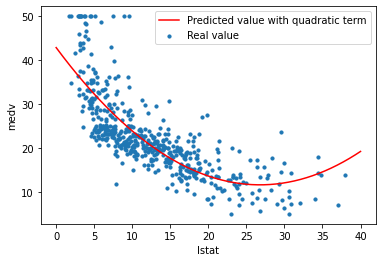

In [39]:
x_new = np.linspace(0,40,num=300)
x_new2 = np.column_stack((x_new, x_new**2))
X_new = sm.add_constant(x_new2)
y_new = ols2.predict(X_new)

# 画出二次项函数的图
plt.scatter(x,y,label='Real value',s=10)
plt.plot(x_new,y_new,label='Predicted value with quadratic term',c='r')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.show()

In [40]:
x = np.log(Boston['lstat']) # 对'lstat'进行对数化处理
y = Boston['medv']

X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          9.28e-122
Time:                        12:07:37   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1248      0.965     54.004      0.0

### 3.6.6 定性预测

In [41]:
Carseats = pd.read_csv('C:/Users/ASUS/Desktop/Linear Regression/Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [42]:
# 将定性预测变量转换为虚拟变量
dummy_fields = ['ShelveLoc','Urban','US']
for i in dummy_fields:
    dummies = pd.get_dummies(Carseats[i], prefix=i)
    Carseats = pd.concat([Carseats,dummies],axis=1)
    Carseats = Carseats.drop(i,axis=1) # 删除原来的3列
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [43]:
# 所有自变量对sales做回归
f = 'Sales~Income:Advertising+Price:Age' 
y, x = patsy.dmatrices(f, Carseats, return_type='matrix')
X = np.column_stack((x,Carseats.drop(['Sales','ShelveLoc_Bad','Urban_No','US_No'],axis=1))) # 避免虚拟变量陷阱
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          6.14e-166
Time:                        12:07:38   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5756      1.009      6.519      0.0